In [1]:
!echo $http_proxy

In [2]:
import comet_ml
comet_ml.login()

In [3]:

from comet_ml import Experiment
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf


2024-12-13 13:07:58.769776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 13:07:58.776451: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 13:07:58.817931: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 13:07:58.848719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734113278.878410   10201 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734113278.88

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255


In [5]:
print("y_train shape : " ,y_train.shape)
print("y_test shape : " ,y_train.shape)

y_train shape :  (60000,)
y_test shape :  (60000,)


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
def build_cnn_model(numfm, numnodes, input_shape = (28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(numfm, kernel_size = (5, 5), input_shape = input_shape, activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Conv2D(2 * numfm, kernel_size = (3, 3), activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Flatten())
    model.add(Dense(numnodes, activation = "tanh"))
    model.add(Dense(10, activation = "softmax"))
    return model

model = build_cnn_model(20,100)
experiment = Experiment(project_name="Confusion Matrix")

# Display Comet UI
experiment.display()

# experiment.log_dataset_hash(x_train)
params = {
    'batch_size': 64,
    'epochs': 3,
    'optimizer': 'sgd',
    'loss_function': 'categorical_crossentropy',
    'metrics': ['accuracy']
}



# Log dataset hash

# experiment.log_parameters(params)

model.compile(
    optimizer=params['optimizer'],
    loss=params['loss_function'],
    metrics=params['metrics']
)

# Summary of the model
model.summary()

/home/nast/SHARCNET/2024/HPC/ENV/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-13 13:08:00.529187: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
[codecarbon INFO @ 13:08:01] [setup] RAM Tracking...
[codecarbon INFO @ 13:08:01] [setup] GPU Tracking...
[codecarbon INFO @ 13:08:01] No GPU found.
[codecarbon INFO @ 13:08:01] [setup] CPU Tracking...
[codecarbon WARNING @ 13:08:01] No CPU tracking mode found. Falling back on 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 20)     │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 40)     │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,870 (425.27 KB)

 Trainable params: 108,870 (425.27 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
with experiment.train():
    history = model.fit(
        x_train, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        verbose=2,
        validation_data=(x_test, y_test),
    )


COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/3
938/938 - 5s - 5ms/step - accuracy: 0.8079 - loss: 0.7170 - val_accuracy: 0.9250 - val_loss: 0.2695
Epoch 2/3
938/938 - 5s - 5ms/step - accuracy: 0.9364 - loss: 0.2234 - val_accuracy: 0.9521 - val_loss: 0.1661
Epoch 3/3


[codecarbon INFO @ 13:08:20] Energy consumed for RAM : 0.000048 kWh. RAM Power : 11.60967206954956 W
[codecarbon INFO @ 13:08:20] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:08:20] 0.000225 kWh of electricity used since the beginning.


938/938 - 5s - 5ms/step - accuracy: 0.9551 - loss: 0.1582 - val_accuracy: 0.9644 - val_loss: 0.1263


In [9]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()  # Adjust as per your task

# Training loop

for epoch in range(30):
    with tf.GradientTape() as tape:
        predictions = model(x_test)
        loss = loss_fn(y_test, predictions)
    grads = tape.gradient(loss, model.trainable_variables)

        # Log gradients as histograms
    for i, grad in enumerate(grads):
        experiment.log_histogram_3d(
            grad.numpy().flatten(), name=f"Gradient_Layer_{i}", step=epoch
        )

[codecarbon INFO @ 13:08:35] Energy consumed for RAM : 0.000097 kWh. RAM Power : 11.60967206954956 W
[codecarbon INFO @ 13:08:35] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:08:35] 0.000451 kWh of electricity used since the beginning.


In [10]:
predicted = model.predict(x_test).argmax(-1)
y_true = np.argmax(y_test, axis=1)

# Log confusion matrix
experiment.log_confusion_matrix(
    y_true=y_true,
    y_predicted=predicted
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


{'web': 'https://www.comet.com/api/asset/download?assetId=646c500f1e8f4d11ab51c7b15c2bc4a1&experimentKey=89618eb33e4746eea3dc734421a33919',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=646c500f1e8f4d11ab51c7b15c2bc4a1&experimentKey=89618eb33e4746eea3dc734421a33919',
 'assetId': '646c500f1e8f4d11ab51c7b15c2bc4a1'}

[codecarbon INFO @ 13:08:39] Energy consumed for RAM : 0.000109 kWh. RAM Power : 11.60967206954956 W
[codecarbon INFO @ 13:08:39] Energy consumed for all CPUs : 0.000400 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:08:39] 0.000509 kWh of electricity used since the beginning.
/home/nast/SHARCNET/2024/HPC/ENV/lib/python3.10/site-packages/codecarbon/output_methods/file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:

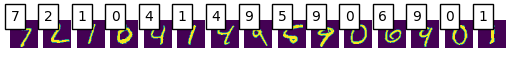

In [11]:
slice=15
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(x_test[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black',
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Check the 'Graphics' tab to see this logged figure
experiment.log_figure('Model Sample Prediction', plt)

experiment.end()